## Parte 1: visualizando os dados, iniciando tratamentos e juntando os arquivos

### Visualizando databases

In [145]:
import pandas as pd

escolas_df = pd.read_csv(r'./dados/escolas.csv')
escolas_df = escolas_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
#display(escolas_df)

subprefeituras_df = pd.read_csv(r'./dados/subprefeituras.csv')
subprefeituras_df = subprefeituras_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
#display(subprefeituras_df)

material_didatico_df = pd.read_csv(r'./dados/material_didatico.csv')
material_didatico_df = material_didatico_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
#display(material_didatico_df)

### Dando o merge dos 3 arquivos

In [146]:
# Merge nos df: escolas_df e material_didatico_df

df_merge = escolas_df.merge(material_didatico_df, on='id')

# modificando o nome da coluna 'nome' para 'bairro' afim de poder fazer o merge
subprefeituras_df.rename(columns={'nome':'BAIRRO'}, inplace=True)

# Merge no df merge com o subprefeituras_df
df_merge = df_merge.merge(subprefeituras_df, on='BAIRRO')

#display(df_merge)  

### Renomeando colunas e iniciando tratamentos NaN

In [147]:
# tratando os NaN
df_merge['subprefeitura'].fillna('desconhecido', inplace=True)


# renomeando as colunas
# id da escola, nome da escola, tipo da escola (EM, CIEP ou colégio), logradouro da entrega, número, bairro, subprefeitura, latitude, longitude e quantidade de mat erial didático que deve ser entregue. O logradouro da escola deve estar em uma coluna diferente do número
novos_nomes = {
    'id': 'id_escola',
    'Escolas_Postos': 'nome_escola',
    'tipo_escola': 'tipo_escola',
    'BAIRRO': 'bairro',
    'ENDEREÇO ': 'endereco',
    'lat': 'latitude',
    'lon': 'longitude',
    'Quantidade': 'quantidade_material',
    'subprefeitura': 'subprefeitura'
}

df_merge.rename(columns=novos_nomes, inplace=True)

display(df_merge)

,id_escola,nome_escola,bairro,endereco,latitude,longitude,quantidade_material,subprefeitura
0,178,centro integrado de educação pública henfil,caju,rua carlos seidl s/nº,"-22,880888","-43,225326",20,centro
1,634,em alice do amaral peixoto,benfica,rua ébano 187,"-22,889574","-43,236202",121,centro
2,600,em uruguai,benfica,rua ana néri 192,"-22,898488","-43,237756",591,centro
3,483,em celestino silva,centro,"r. do lavradio, 56","-22,909293","-43,183579",220,centro
4,490,e.m tia ciata,centro,avenida presidente vargas s/nº,"-22,907123","-43,195068",578,centro
...,...,...,...,...,...,...,...,...
129,289,em bertha lutz,guaratiba,estrada do piaí 2075,"-22,979064","-43,67058",329,zona oeste
130,474,em engenheiro gastão rangel,guaratiba,estrada do magarça 9.183,"-22,98046","-43,643545",320,zona oeste
131,301,em jonatas serrano,guaratiba,"estrada do mato alto, s/nº","-22,953163","-43,577409",335,zona oeste
132,215,e.m. narcisa amalia,ilha de guaratiba,estrada teodoreto de camargo s/n.º,"-23,009084","-43,537582",NaN,zona oeste


### Separando a coluna endereço

In [148]:
#Dividindo a coluna endereço em endereço e número

# Criar a coluna 'numero' com os caracteres após o último espaço na coluna 'endereco'
df_merge['numero'] = df_merge['endereco'].str.split(' ').str[-1]

# Atualizar a coluna 'endereco' para conter apenas o que está antes do último espaço
df_merge['endereco'] = df_merge['endereco'].str.rsplit(' ', 1).str[0]

# retirando as aspas e as virgulas
df_merge['endereco'] = df_merge['endereco'].str.replace(',', '').str.replace('"', '')

C:\Users\Tigrocomputer\AppData\Local\Temp\ipykernel_21540\2869524866.py:7: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_merge['endereco'] = df_merge['endereco'].str.rsplit(' ', 1).str[0]


# Tratando dados

### Tratando números

In [149]:
#Padronização de 5 caracteres decimais nas colunas 'Latitude' e 'Longitude'

# Converter a coluna 'latitude' para formato de string e limitar a 9 caracteres
df_merge['latitude'] = df_merge['latitude'].apply(lambda x: float(str(x)[:9].replace(",", ".")))

# Converter a coluna 'longitude' para formato de string e limitar a 9 caracteres
df_merge['longitude'] = df_merge['longitude'].apply(lambda x: float(str(x)[:9].replace(",", ".")))

In [150]:
# Limpando a coluna 'quantidade_material' para garantir que contenha apenas números
df_merge['quantidade_material'] = pd.to_numeric(df_merge['quantidade_material'], errors='coerce')
display(df_merge['quantidade_material'])

0       20.0
1      121.0
2      591.0
3      220.0
4      578.0
       ...  
129    329.0
130    320.0
131    335.0
132      NaN
133    521.0
Name: quantidade_material, Length: 134, dtype: float64

### Tratando strings

In [151]:
# Remover acentuação das colunas 'nome_escola', 'bairro', 'endereco' e 'subprefeitura'

# importando a biblioteca unidecode
from unidecode import unidecode

df_merge['nome_escola'] = df_merge['nome_escola'].apply(unidecode)
df_merge['bairro'] = df_merge['bairro'].apply(unidecode)
df_merge['endereco'] = df_merge['endereco'].apply(unidecode)
df_merge['subprefeitura'] = df_merge['subprefeitura'].apply(unidecode)


In [152]:
# Colocar todas as strings em maiúsculo nas colunas 'nome_escola', 'bairro', 'endereco' e 'subprefeitura'
df_merge['nome_escola'] = df_merge['nome_escola'].str.upper()
df_merge['bairro'] = df_merge['bairro'].str.upper()
df_merge['endereco'] = df_merge['endereco'].str.upper()
df_merge['subprefeitura'] = df_merge['subprefeitura'].str.upper()

In [153]:
# Converter a coluna 'id_escola' para strings com no máximo 3 caracteres e preencher com zeros à esquerda
df_merge['id_escola'] = df_merge['id_escola'].astype(str).str.zfill(3)

In [154]:
replaces = {
    "R.": "RUA",
    "AV.": "AVENIDA",
    "PCA.": "PRAÇA"
}

def tratarEndereco(x):
    for key in replaces:
        x = x.replace(key, replaces[key])
    return x

df_merge['endereco'] = df_merge['endereco'].apply(tratarEndereco)


### Categorizando escolas

In [155]:
categorias_escolas = {
    "E.M": "EM",
    "E.M.": "EM",
    "EM": "EM",
    "E.M.": "EM",
    "CIEP": "CIEP"
}

def categorizarColegio(x):
    for key in categorias_escolas:
        if(x.find(key)):
            x = categorias_escolas[key]
        else:
            x = "COLÉGIO"
        return x

df_merge['tipo_escola'] = df_merge['nome_escola'].apply(categorizarColegio)

### Reorganizando a ordem

In [156]:
# Organizar as colunas na ordem desejada
df_merge = df_merge[['id_escola', 'tipo_escola', 'nome_escola', 'endereco', 'numero', 'bairro', 'latitude', 'longitude', 'quantidade_material', 'subprefeitura']]

In [157]:
# Exibir o DataFrame resultante
display(df_merge)

,id_escola,tipo_escola,nome_escola,endereco,numero,bairro,latitude,longitude,quantidade_material,subprefeitura
0,178,EM,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,RUA CARLOS SEIDL,s/nº,CAJU,-22.88088,-43.22532,20.0,CENTRO
1,634,EM,EM ALICE DO AMARAL PEIXOTO,RUA EBANO,187,BENFICA,-22.88957,-43.23620,121.0,CENTRO
2,600,EM,EM URUGUAI,RUA ANA NERI,192,BENFICA,-22.89848,-43.23775,591.0,CENTRO
3,483,EM,EM CELESTINO SILVA,RUA DO LAVRADIO,56,CENTRO,-22.90929,-43.18357,220.0,CENTRO
4,490,COLÉGIO,E.M TIA CIATA,AVENIDA PRESIDENTE VARGAS,s/nº,CENTRO,-22.90712,-43.19506,578.0,CENTRO
...,...,...,...,...,...,...,...,...,...,...
129,289,EM,EM BERTHA LUTZ,ESTRADA DO PIAI,2075,GUARATIBA,-22.97906,-43.67058,329.0,ZONA OESTE
130,474,EM,EM ENGENHEIRO GASTAO RANGEL,ESTRADA DO MAGARCA,9.183,GUARATIBA,-22.98046,-43.64354,320.0,ZONA OESTE
131,301,EM,EM JONATAS SERRANO,ESTRADA DO MATO ALTO,s/nº,GUARATIBA,-22.95316,-43.57740,335.0,ZONA OESTE
132,215,COLÉGIO,E.M. NARCISA AMALIA,ESTRADA TEODORETO DE CAMARGO,s/n.º,ILHA DE GUARATIBA,-23.00908,-43.53758,NaN,ZONA OESTE


# Parte 2: salvar arquivo final tratado

### Colocar na ordem correta de acordo com o melhor caminho (Google API)

In [158]:
import requests
import json

def criarJson():
    origin = {
        "latitude": -22.89574, 
        "longitude": -43.236202
    }
    
    myRoutes = {
        "origin": {
            "location": {
                "latLng": {
                    "latitude": origin["latitude"],
                    "longitude": origin["longitude"]
                },
                "heading": 0
            }
        },
        "destination": {
            "location": {
                "latLng": {
                    "latitude": origin["latitude"], 
                    "longitude":  origin["longitude"],
                },
                "heading": 360
            }
        },
        "intermediates": [],
        "travelMode": "DRIVE",
        "optimizeWaypointOrder": "true"
    }

    orderID = []

    count = 0
    for row in df_merge.itertuples(index=False):
        #max request is 25
        count += 1
        if(count > 25): 
            break

        orderID.append(row.id_escola)

        newRoute = {
            "location": {
                "latLng": {  
                    "latitude": float(row.latitude), 
                    "longitude": float(row.longitude)
                },
                "heading": 0
            }
        }
        myRoutes["intermediates"].append(newRoute)
        
    json_object = json.dumps(myRoutes)
    print(orderID)
    return json_object

# def ordernarRotas():

def buscarRotas():
    headers = { "X-Goog-Api-Key" : "" , "X-Goog-FieldMask": "routes.optimizedIntermediateWaypointIndex" }
    response = requests.post('https://routes.googleapis.com/directions/v2:computeRoutes', data=criarJson(), headers=headers)
    response_details = response.json()
    print(response_details)

buscarRotas()

['178', '634', '600', '483', '490', '476', '132', '089', '089', '089', '089', '017', '017', '540', '055', '331', '450', '558', '413', '413', '309', '523', '268', '035', '011']


{'error': {'code': 403, 'message': 'The request is missing a valid API key.', 'status': 'PERMISSION_DENIED'}}


### Colocar na ordem correta de acordo com o melhor caminho (Otimizador)

In [159]:
from otimizador import *

def criarRotas():
    points = []   
    latLong = [] 

    for row in df_merge.itertuples(index=False):
        points.append(row.id_escola)
        latLong.append((float(row.latitude), float(row.longitude)))
    
    index = nearest_neighbor(latLong)
    orderPoints = []

    for i in range(0, len(points)):
        orderPoints.append((points[i], index[i])) 
    
    orderPoints.sort(key= lambda x: x[1]) 
    return orderPoints

rotasOtimizadas = criarRotas()
display(df_merge)
rotasOtimizadas

,id_escola,tipo_escola,nome_escola,endereco,numero,bairro,latitude,longitude,quantidade_material,subprefeitura
0,178,EM,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFIL,RUA CARLOS SEIDL,s/nº,CAJU,-22.88088,-43.22532,20.0,CENTRO
1,634,EM,EM ALICE DO AMARAL PEIXOTO,RUA EBANO,187,BENFICA,-22.88957,-43.23620,121.0,CENTRO
2,600,EM,EM URUGUAI,RUA ANA NERI,192,BENFICA,-22.89848,-43.23775,591.0,CENTRO
3,483,EM,EM CELESTINO SILVA,RUA DO LAVRADIO,56,CENTRO,-22.90929,-43.18357,220.0,CENTRO
4,490,COLÉGIO,E.M TIA CIATA,AVENIDA PRESIDENTE VARGAS,s/nº,CENTRO,-22.90712,-43.19506,578.0,CENTRO
...,...,...,...,...,...,...,...,...,...,...
129,289,EM,EM BERTHA LUTZ,ESTRADA DO PIAI,2075,GUARATIBA,-22.97906,-43.67058,329.0,ZONA OESTE
130,474,EM,EM ENGENHEIRO GASTAO RANGEL,ESTRADA DO MAGARCA,9.183,GUARATIBA,-22.98046,-43.64354,320.0,ZONA OESTE
131,301,EM,EM JONATAS SERRANO,ESTRADA DO MATO ALTO,s/nº,GUARATIBA,-22.95316,-43.57740,335.0,ZONA OESTE
132,215,COLÉGIO,E.M. NARCISA AMALIA,ESTRADA TEODORETO DE CAMARGO,s/n.º,ILHA DE GUARATIBA,-23.00908,-43.53758,NaN,ZONA OESTE


[('178', 0),
 ('634', 1),
 ('600', 2),
 ('017', 3),
 ('017', 4),
 ('483', 5),
 ('089', 6),
 ('476', 7),
 ('132', 8),
 ('089', 9),
 ('089', 10),
 ('309', 11),
 ('523', 12),
 ('268', 13),
 ('089', 14),
 ('540', 15),
 ('331', 16),
 ('413', 17),
 ('413', 18),
 ('031', 19),
 ('558', 20),
 ('450', 21),
 ('308', 22),
 ('055', 23),
 ('520', 24),
 ('673', 25),
 ('520', 26),
 ('361', 27),
 ('490', 28),
 ('226', 29),
 ('603', 30),
 ('011', 31),
 ('163', 32),
 ('256', 33),
 ('091', 34),
 ('035', 35),
 ('589', 36),
 ('676', 37),
 ('390', 38),
 ('608', 39),
 ('623', 40),
 ('576', 41),
 ('638', 42),
 ('126', 43),
 ('587', 44),
 ('248', 45),
 ('388', 46),
 ('259', 47),
 ('180', 48),
 ('653', 49),
 ('422', 50),
 ('351', 51),
 ('157', 52),
 ('117', 53),
 ('020', 54),
 ('429', 55),
 ('206', 56),
 ('206', 57),
 ('527', 58),
 ('175', 59),
 ('586', 60),
 ('689', 61),
 ('636', 62),
 ('080', 63),
 ('641', 64),
 ('624', 65),
 ('025', 66),
 ('382', 67),
 ('378', 68),
 ('660', 69),
 ('217', 70),
 ('660', 71),
 (

### Criando arquivo csv já tratado

In [160]:
#Ordernar dataframe
id_escolaOrder = [] 
for i in rotasOtimizadas:
    id_escolaOrder.append(i[0])

df_merge = df_merge.sort_values('id_escola', key=lambda x: x.map({v:k for k, v in enumerate(id_escolaOrder)}))

# Salvar o DataFrame de volta no arquivo CSV
df_merge.to_csv('./output/escolas_tratadas.csv')
df_merge

#retirando outliers
df_merge = df_merge[(df_merge['latitude']>-10000) & (df_merge['longitude']>-10000)]

# Parte 3: arquivo com total de material escolar por subprefeitura

In [161]:
# Agrupando os dados por subprefeitura e somando a quantidade de material em cada grupo
agrupado_por_subprefeitura = df_merge.groupby('subprefeitura')['quantidade_material'].sum().reset_index()

# Renomeiando a coluna para 'total_material_por_subprefeitura'
agrupado_por_subprefeitura.rename(columns={'quantidade_material': 'total_material_por_subprefeitura'}, inplace=True)

display(agrupado_por_subprefeitura)

,subprefeitura,total_material_por_subprefeitura
0,BARRA DA TIJUCA,215.0
1,CENTRO,3771.0
2,GRANDE BANGU,4115.0
3,GRANDE TIJUCA,2125.0
4,ILHAS,741.0
5,JACAREPAGUA,1961.0
6,ZONA NORTE,14843.0
7,ZONA OESTE,6831.0
8,ZONA SUL,3848.0


In [162]:
# Salvando arquivo CSV
agrupado_por_subprefeitura.to_csv('./output/quantidade_material_por_subprefeitura.csv', index=False)

# Exibindo o DataFrame resultante
print(agrupado_por_subprefeitura)

     subprefeitura  total_material_por_subprefeitura
0  BARRA DA TIJUCA                             215.0
1           CENTRO                            3771.0
2     GRANDE BANGU                            4115.0
3    GRANDE TIJUCA                            2125.0
4            ILHAS                             741.0
5      JACAREPAGUA                            1961.0
6       ZONA NORTE                           14843.0
7       ZONA OESTE                            6831.0
8         ZONA SUL                            3848.0


# Parte 4: Plotagem da rota otimizada

In [163]:
#retirando outliers
#df_merge = df_merge[(df_merge['latitude']>-10000) & (escolas_df['longitude']>-10000)]

#df_merge

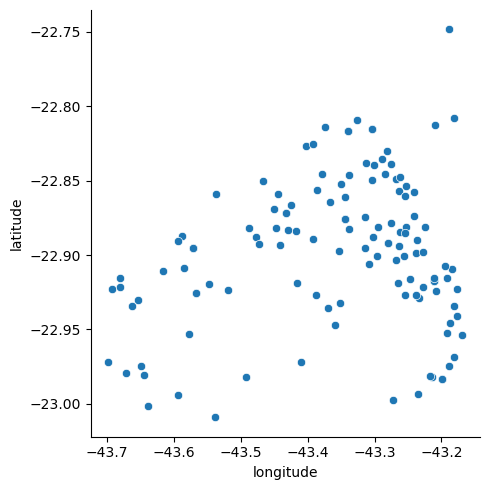

In [164]:
import seaborn as sns

sns.relplot(
    data=df_merge,
    x="longitude", y="latitude",
)